In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as ptick
import scipy.special as sp

In [305]:
df = pd.read_csv("./WaveData/scope_122.csv", names = ["time", "signal", "sync"], skiprows = 2, skipfooter=1, engine="python")

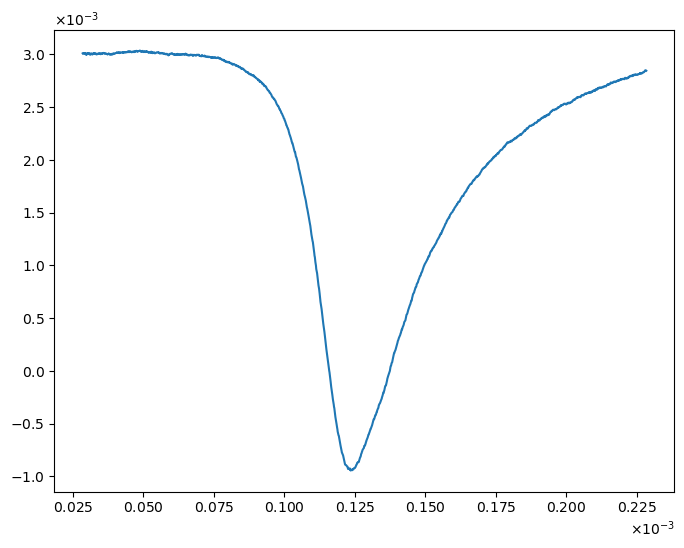

In [306]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))

In [307]:
def CrystalBall(x, x0, sigma_left, alpha_left, n_left, 
                sigma_right, alpha_right,n_right, const, Cap_N):
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
  Bl = n_left/np.abs(alpha_left)-np.abs(alpha_left)
  Br = n_right/np.abs(alpha_right)-np.abs(alpha_right)
  Cl = (n_left/np.abs(alpha_left))*(1/(n_left-1))*np.exp(-alpha_left**2/2)
  Cr = (n_right/np.abs(alpha_right))*(1/(n_right-1))*np.exp(-alpha_right**2/2)
  Dl = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_left)/np.sqrt(2)))
  Dr = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_right)/np.sqrt(2)))
  Nl = 1/(sigma_left*(Cl+Dl))
  Nr = 1/(sigma_right*(Cr+Dr))

  """
  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Nl*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Nl*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
    y = const-Nr*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
    y = const-Nr*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y
  """

  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
     y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
     y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y

crystal_ball = np.vectorize(CrystalBall)

In [308]:
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (0.125*10**(-3), 0.125*10**(-3), 1, 3, 0.125*10**(-3), 1, 2, 3*10**(-3), 1))
par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.23973294e-04, 1.08448772e-05, 1.12899972e+00, 1.17570679e+02, 1.508097853e-05, 4.50396123e-01, 1.01912331e+02, 2.96644947e-03, 3.9e-03)) #scope_122.csv
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.26e-04, 0.908448772e-05, 0.82899972e+00, 1.17570679e+02, 1.208097853e-05, 3.70396123e-01, 1.01912331e+02, 2.96644947e-03, 3.9e-03)) #scope_125.csv
x = np.linspace(0.1*10**(-3), 0.175*10**(-3), 1000)
y = crystal_ball(x, par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8])

/tmp/ipykernel_562/748180570.py:3: RuntimeWarning: overflow encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
/tmp/ipykernel_562/748180570.py:4: RuntimeWarning: invalid value encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
/tmp/ipykernel_562/748180570.py:27: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
/tmp/ipykernel_562/748180570.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
/tmp/ipykernel_562/748180570.py:4: RuntimeWarning: overflow encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)


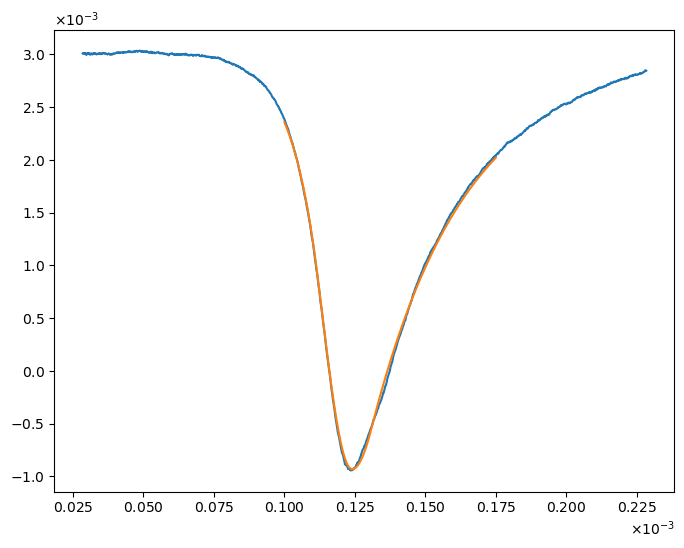

In [309]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
plt.plot(x, y)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))
plt.savefig("./peak/120-129/crystal_ball/2.png")

In [303]:
par

array([1.25995137e-04, 9.08805551e-06, 8.29133309e-01, 1.38645590e+02,
       1.20789280e-05, 3.70495076e-01, 1.07951025e+02, 2.96691706e-03,
       3.90095872e-03])